# 一起来打怪之 Credit Scoring 练习

---
## 作业说明

- 答题步骤：
    - 回答问题**请保留每一步**操作过程，请不要仅仅给出最后答案
    - 请养成代码注释的好习惯

- 解题思路：
    - 为方便大家准确理解题目，在习题实战中有所收获，本文档提供了解题思路提示
    - 解题思路**仅供参考**，鼓励原创解题方法
    - 为督促同学们自己思考，解题思路内容设置为**白色**，必要时请从冒号后拖动鼠标查看

- 所用数据
    - 请注意导入数据库后先**查看和了解数据的基本性质**，后面的问题不再一一提醒

## machine learning for credit scoring


Banks play a crucial role in market economies. They decide who can get finance and on what terms and can make or break investment decisions. For markets and society to function, individuals and companies need access to credit. 

Credit scoring algorithms, which make a guess at the probability of default, are the method banks use to determine whether or not a loan should be granted. This competition requires participants to improve on the state of the art in credit scoring, by predicting the probability that somebody will experience financial distress in the next two years. [Dataset](https://www.kaggle.com/c/GiveMeSomeCredit)

Attribute Information:

|Variable Name	|	Description	|	Type|
|----|----|----|
|SeriousDlqin2yrs	|	Person experienced 90 days past due delinquency or worse 	|	Y/N|
|RevolvingUtilizationOfUnsecuredLines	|	Total balance on credit divided by the sum of credit limits	|	percentage|
|age	|	Age of borrower in years	|	integer|
|NumberOfTime30-59DaysPastDueNotWorse	|	Number of times borrower has been 30-59 days past due |	integer|
|DebtRatio	|	Monthly debt payments	|	percentage|
|MonthlyIncome	|	Monthly income	|	real|
|NumberOfOpenCreditLinesAndLoans	|	Number of Open loans |	integer|
|NumberOfTimes90DaysLate	|	Number of times borrower has been 90 days or more past due.	|	integer|
|NumberRealEstateLoansOrLines	|	Number of mortgage and real estate loans	|	integer|
|NumberOfTime60-89DaysPastDueNotWorse	|	Number of times borrower has been 60-89 days past due |integer|
|NumberOfDependents	|	Number of dependents in family	|	integer|


----------
## Read the data into Pandas 

In [2]:
import pandas as pd
pd.set_option('display.max_columns', 500)
import zipfile
with zipfile.ZipFile('KaggleCredit2.csv.zip', 'r') as z:
    f = z.open('KaggleCredit2.csv')
    data = pd.read_csv(f, index_col=0)
data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45.0,2.0,0.802982,9120.0,13.0,0.0,6.0,0.0,2.0
1,0,0.957151,40.0,0.0,0.121876,2600.0,4.0,0.0,0.0,0.0,1.0
2,0,0.658180,38.0,1.0,0.085113,3042.0,2.0,1.0,0.0,0.0,0.0
3,0,0.233810,30.0,0.0,0.036050,3300.0,5.0,0.0,0.0,0.0,0.0
4,0,0.907239,49.0,1.0,0.024926,63588.0,7.0,0.0,1.0,0.0,0.0


In [3]:
data.shape

(112915, 11)

------------
## Drop na

In [4]:
data.isnull().sum(axis=0)

SeriousDlqin2yrs                           0
RevolvingUtilizationOfUnsecuredLines       0
age                                     4267
NumberOfTime30-59DaysPastDueNotWorse       0
DebtRatio                                  0
MonthlyIncome                              0
NumberOfOpenCreditLinesAndLoans            0
NumberOfTimes90DaysLate                    0
NumberRealEstateLoansOrLines               0
NumberOfTime60-89DaysPastDueNotWorse       0
NumberOfDependents                      4267
dtype: int64

In [5]:
data.dropna(inplace=True)
data.shape

(108648, 11)

---------
## Create X and y

In [6]:
y = data['SeriousDlqin2yrs']
X = data.drop('SeriousDlqin2yrs', axis=1)

In [7]:
y.mean()

0.06742876076872101

---
## 练习1：把数据切分成训练集和测试集
- 提示：<span style='color:white'>from sklearn.model_selection import train_test_split('Gender') </span>

In [8]:
## your code here
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=0)

# 查看数据的维度
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((76053, 10), (32595, 10), (76053,), (32595,))

In [9]:
y_test

107294    0
39317     0
40606     0
68931     0
20745     0
         ..
65166     0
109192    0
85812     0
50213     0
23557     0
Name: SeriousDlqin2yrs, Length: 32595, dtype: int64

----
## 练习2：使用logistic regression/决策树/SVM/KNN...等sklearn分类算法进行分类
尝试查sklearn API了解模型参数含义，调整不同的参数

### Logistic regression
- 提示：<span style='color:white'>from sklearn import linear_model('Gender') </span>

In [10]:
## your code here
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# 创建 LogisticRegression 模型实例
lr_model = LogisticRegression(penalty='l2',    # 正则化类型
                           dual=False,       # 不使用对偶形式
                           tol=0.0001,       # 收敛容忍度
                           C=1.0,            # 正则化强度
                           fit_intercept=True,  # 计算截距
                           class_weight=None,   # 类别权重
                           random_state=None,   # 随机数种子
                           solver='lbfgs',     # 优化算法
                           max_iter=100,        # 最大迭代次数
                           multi_class='auto',  # 多分类策略
                           verbose=0,           # 不输出过程
                           warm_start=False,    # 不使用前次结果初始化
                           n_jobs=None)         # CPU核数

# 训练模型
lr_model.fit(X_train, y_train)


/home/dk/anaconda3/envs/igwn-py39/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### Decision Tree
- 提示：<span style='color:white'>from sklearn.tree import DecisionTreeClassifier('Gender') </span>

In [11]:
## your code here
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# 创建决策树模型实例
dt_model = DecisionTreeClassifier(random_state=42)

# 训练模型
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

### Random Forest
- 提示：<span style='color:white'>from sklearn.ensemble import RandomForestClassifier('Gender') </span>

In [12]:
## your code here
from sklearn.ensemble import RandomForestClassifier

# 创建随机森林模型实例
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# 训练模型
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### SVM
- 提示：<span style='color:white'>from sklearn.svm import SVC('Gender') </span>

In [13]:
## your code here
from sklearn.svm import SVC

# 创建SVM模型实例
svm_model = SVC(gamma='auto', random_state=42)

# 训练模型
svm_model.fit(X_train, y_train)


SVC(gamma='auto', random_state=42)

### KNN
- 提示：<span style='color:white'>from sklearn.neighbors import KNeighborsClassifier('Gender') </span>

In [14]:
## your code here
from sklearn.neighbors import KNeighborsClassifier

# 创建KNN模型实例，这里假设我们使用5个邻居
knn_model = KNeighborsClassifier(n_neighbors=5)

# 训练模型
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

---

## 练习3：在测试集上进行预测，计算准确度

### Logistic regression
- 提示：<span style='color:white'>y_pred_LR = clf_LR.predict(x_test)('Gender') </span>

In [15]:
## your code here

# 在测试集上进行预测
y_pred_lr = lr_model.predict(X_test)

# 计算准确率
accuracy_lr = accuracy_score(y_test, y_pred_lr)

# 打印准确率和分类报告
print(f'Accuracy: {accuracy_lr}')
print(classification_report(y_test, y_pred_lr))

Accuracy: 0.9333640128854118
              precision    recall  f1-score   support

           0       0.93      1.00      0.97     30424
           1       0.49      0.02      0.04      2171

    accuracy                           0.93     32595
   macro avg       0.71      0.51      0.50     32595
weighted avg       0.91      0.93      0.90     32595



### Decision Tree
- 提示：<span style='color:white'>y_pred_tree = tree.predict(x_test)('Gender') </span>

In [16]:
## your code here
# 在测试集上进行预测
y_pred_dt = dt_model.predict(X_test)

# 计算准确率
accuracy_dt = accuracy_score(y_test, y_pred_dt)

# 打印准确率和分类报告
print(f'Decision Tree Accuracy: {accuracy_dt}')
print(classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.8932658383187605
              precision    recall  f1-score   support

           0       0.95      0.94      0.94     30424
           1       0.24      0.27      0.25      2171

    accuracy                           0.89     32595
   macro avg       0.59      0.60      0.60     32595
weighted avg       0.90      0.89      0.90     32595



### Random Forest
- 提示：<span style='color:white'>y_pred_forest = forest.predict(x_test)('Gender') </span>

In [17]:
## your code here
# 在测试集上进行预测
y_pred_rf = rf_model.predict(X_test)

# 计算准确率
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# 打印准确率和分类报告
print(f'Random Forest Accuracy: {accuracy_rf}')
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.9352047860101242
              precision    recall  f1-score   support

           0       0.94      0.99      0.97     30424
           1       0.54      0.17      0.26      2171

    accuracy                           0.94     32595
   macro avg       0.74      0.58      0.61     32595
weighted avg       0.92      0.94      0.92     32595



### SVM
- 提示：<span style='color:white'>y_pred_SVC = clf_svc.predict(x_test)('Gender') </span>

In [18]:
## your code here
# 在测试集上进行预测
y_pred_svm = svm_model.predict(X_test)

# 计算准确率
accuracy_svm = accuracy_score(y_test, y_pred_svm)

# 打印准确率和分类报告
print(f'SVM Accuracy: {accuracy_svm}')
print(classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.9333333333333333
              precision    recall  f1-score   support

           0       0.93      1.00      0.97     30424
           1       0.38      0.00      0.00      2171

    accuracy                           0.93     32595
   macro avg       0.65      0.50      0.48     32595
weighted avg       0.90      0.93      0.90     32595



### KNN
- 提示：<span style='color:white'>y_pred_KNN = neigh.predict(x_test)('Gender') </span>

In [19]:
## your code here
# 在测试集上进行预测
y_pred_knn = knn_model.predict(X_test)

# 计算准确率
accuracy_knn = accuracy_score(y_test, y_pred_knn)

# 打印准确率和分类报告
print(f'KNN Accuracy: {accuracy_knn}')
print(classification_report(y_test, y_pred_knn))

/home/dk/anaconda3/envs/igwn-py39/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


KNN Accuracy: 0.9321061512501917
              precision    recall  f1-score   support

           0       0.93      1.00      0.96     30424
           1       0.30      0.01      0.03      2171

    accuracy                           0.93     32595
   macro avg       0.62      0.51      0.50     32595
weighted avg       0.89      0.93      0.90     32595



---
## 练习4：查看sklearn的官方说明，了解分类问题的评估标准，并对此例进行评估

**混淆矩阵（Confusion Matrix）相关学习链接**

- Blog:<br>
http://blog.csdn.net/vesper305/article/details/44927047<br>
- WiKi:<br>
http://en.wikipedia.org/wiki/Confusion_matrix<br>
- sklearn doc:<br>
http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

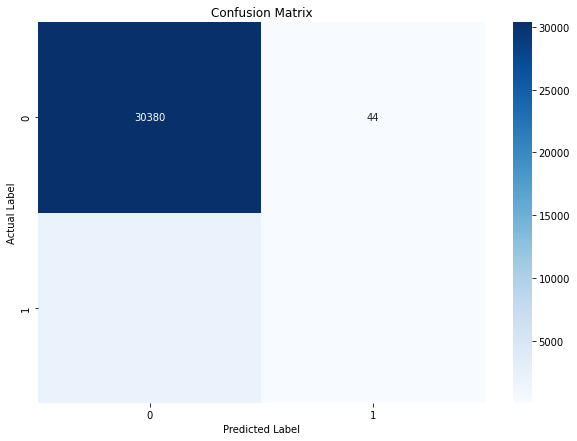

In [31]:
## your code here
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 假设 y_test 是测试集的真实标签，y_pred 是模型的预测标签

# 生成混淆矩阵
conf_matrix = confusion_matrix(y_test, y_pred_lr)

# 使用Seaborn来可视化混淆矩阵
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues")
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()


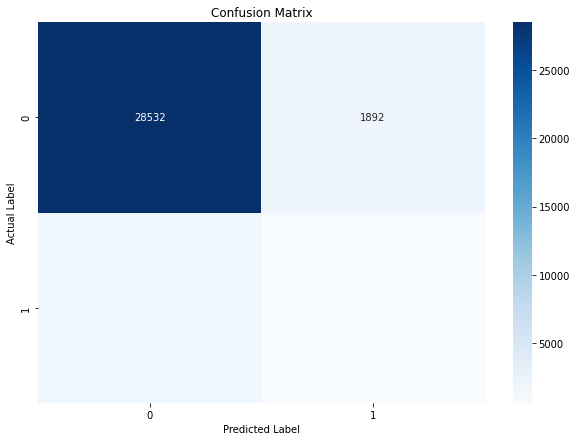

In [34]:
## your code here
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 假设 y_test 是测试集的真实标签，y_pred 是模型的预测标签

# 生成混淆矩阵
conf_matrix = confusion_matrix(y_test, y_pred_dt)

# 使用Seaborn来可视化混淆矩阵
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues")
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()


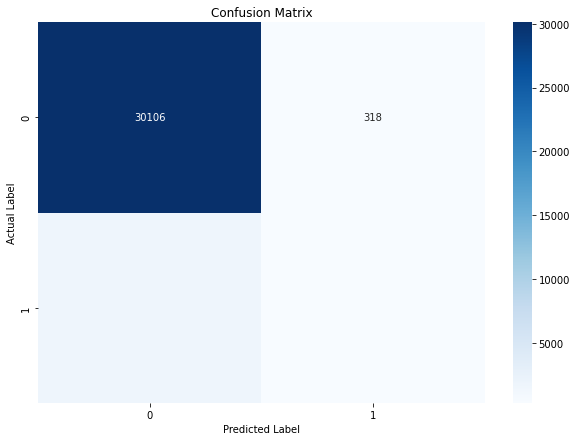

In [22]:
## your code here
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 假设 y_test 是测试集的真实标签，y_pred 是模型的预测标签

# 生成混淆矩阵
conf_matrix = confusion_matrix(y_test, y_pred_rf)

# 使用Seaborn来可视化混淆矩阵
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues")
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()


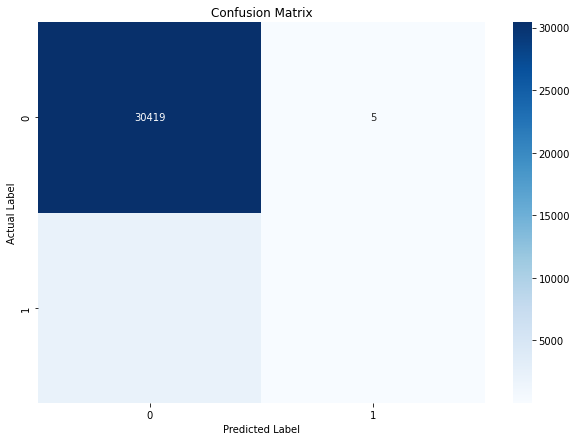

In [23]:
## your code here
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 假设 y_test 是测试集的真实标签，y_pred 是模型的预测标签

# 生成混淆矩阵
conf_matrix = confusion_matrix(y_test, y_pred_svm)

# 使用Seaborn来可视化混淆矩阵
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues")
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()


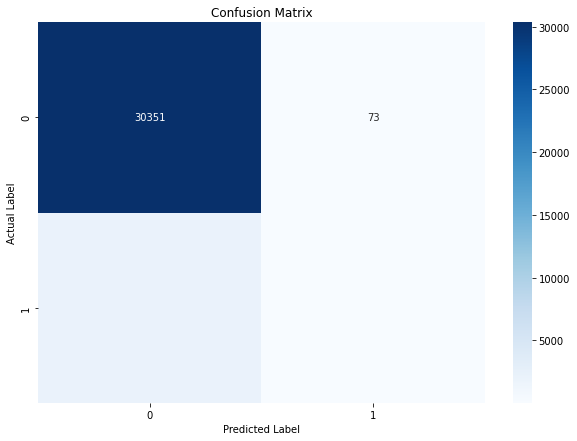

In [24]:
## your code here
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 假设 y_test 是测试集的真实标签，y_pred 是模型的预测标签

# 生成混淆矩阵
conf_matrix = confusion_matrix(y_test, y_pred_knn)

# 使用Seaborn来可视化混淆矩阵
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues")
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()


## 练习5：调整模型的标准

银行通常会有更严格的要求，因为fraud带来的后果通常比较严重，一般我们会调整模型的标准。<br>

比如在logistic regression当中，一般我们的概率判定边界为0.5，但是我们可以把阈值设定低一些，来提高模型的“敏感度”，试试看把阈值设定为0.3，再看看这时的评估指标(主要是准确率和召回率)。

- 提示：<span style='color:white'>sklearn的很多分类模型，predict_prob可以拿到预估的概率，可以根据它和设定的阈值大小去判断最终结果(分类类别)('Gender') </span>

In [25]:
## your code here
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

# 假设 X_train, X_test, y_train, y_test 已经在您的环境中定义好了

# 创建 LogisticRegression 模型实例
lr_model = LogisticRegression(penalty='l2',    # 正则化类型
                              dual=False,       # 不使用对偶形式
                              tol=0.0001,       # 收敛容忍度
                              C=1.0,            # 正则化强度
                              fit_intercept=True,  # 计算截距
                              class_weight=None,   # 类别权重
                              random_state=None,   # 随机数种子
                              solver='lbfgs',     # 优化算法
                              max_iter=100,        # 最大迭代次数
                              multi_class='auto',  # 多分类策略
                              verbose=0,           # 不输出过程
                              warm_start=False,    # 不使用前次结果初始化
                              n_jobs=None)         # CPU核数

# 训练模型
lr_model.fit(X_train, y_train)

# 获取测试集上的预测概率
y_proba = lr_model.predict_proba(X_test)[:, 1]

# 定义一个阈值
threshold = 0.3

# 根据阈值生成自定义的预测结果
y_pred_custom = np.where(y_proba >= threshold, 1, 0)

# 计算准确率
accuracy_custom = accuracy_score(y_test, y_pred_custom)

# 计算混淆矩阵
conf_matrix_custom = confusion_matrix(y_test, y_pred_custom)

# 打印准确率和分类报告
print(f'Custom Threshold Accuracy: {accuracy_custom}')
print(classification_report(y_test, y_pred_custom))

# 打印混淆矩阵
print('Confusion Matrix:')
print(conf_matrix_custom)


Custom Threshold Accuracy: 0.9312778033440712
              precision    recall  f1-score   support

           0       0.94      0.99      0.96     30424
           1       0.40      0.07      0.12      2171

    accuracy                           0.93     32595
   macro avg       0.67      0.53      0.54     32595
weighted avg       0.90      0.93      0.91     32595

Confusion Matrix:
[[30208   216]
 [ 2024   147]]


/home/dk/anaconda3/envs/igwn-py39/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
